<a href="https://colab.research.google.com/github/JibrilTheUltimateFlugel/TensorflowTest/blob/main/TensorflowCNNfromScratchModified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plot
from keras.datasets import cifar10

In [2]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

In [3]:
print(train_img.shape)
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_img = train_img/255.0
test_img = test_img/255.0

In [6]:
#Ver 2.0 Using tf.data.Dataset and batching as well as shuffling
train_dataset = tf.data.Dataset.from_tensor_slices((train_img,train_lab))
train_dataset = train_dataset.shuffle(5000).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_img,test_lab))
test_dataset = test_dataset.shuffle(1000).batch(32)

In [7]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [8]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [9]:
#Now use the datasets to fit to the model!
history = model.fit(train_dataset,epochs=10,validation_data=(test_dataset))
model.save('cnnfromscratch.h5')

Epoch 1/10
1563/1563 [==============================] - 48s 13ms/step - loss: 1.7366 - accuracy: 0.3669 - val_loss: 1.1880 - val_accuracy: 0.5812
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1778 - accuracy: 0.5838 - val_loss: 1.0542 - val_accuracy: 0.6328
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0336 - accuracy: 0.6379 - val_loss: 0.9531 - val_accuracy: 0.6705
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9448 - accuracy: 0.6717 - val_loss: 0.9363 - val_accuracy: 0.6754
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8833 - accuracy: 0.6913 - val_loss: 0.8886 - val_accuracy: 0.6978
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8387 - accuracy: 0.7102 - val_loss: 0.8621 - val_accuracy: 0.7049
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7845 - accuracy: 0.7281 - val_loss: 0.8500 -

In [10]:
#Evaluating the model
loss, accuracy = model.evaluate(train_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

1563/1563 [==============================] - 12s 7ms/step - loss: 0.5457 - accuracy: 0.8123
Loss: 0.545724630355835
Accuracy: 0.8123000264167786


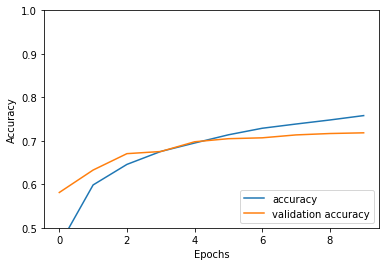

In [12]:
plot.plot(history.history['accuracy'], label='accuracy') 
plot.plot(history.history['val_accuracy'], label='validation accuracy')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.ylim([0.5,1])
plot.legend(loc = 'lower right')